LOCO, AT version


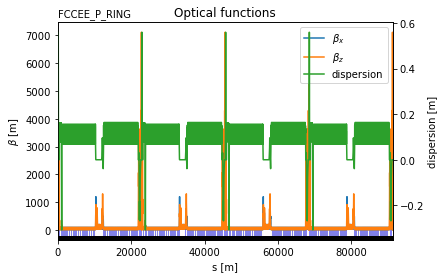

Execution time loading lattice: 18.086864233016968 sec


In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
#from profiling_at_modules_loco import *
#ring=at.Lattice(ring1, energy=1)
t0_fullCode =  time.time()
t0 = time.time()

ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

t1 = time.time()
print(f"Execution time loading lattice: {t1-t0} sec")

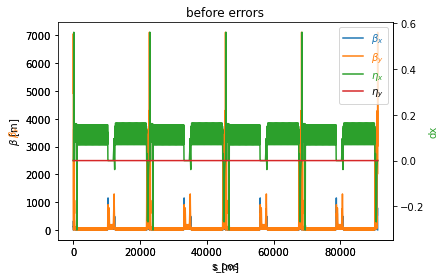

getOptics: 1.7122788429260254 sec


In [2]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [3]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(166, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  3324
Number of used Correctors:  21
Execution time choose correctors: 0.010970354080200195 sec


In [4]:
used_correctors

['CXY4',
 'CXY1041',
 'CXY2135',
 'CXY3145',
 'CXY4239',
 'CXY5280',
 'CXY6314',
 'CXY7412',
 'CXY8418',
 'CXY9516',
 'CXY10559',
 'CXY11587',
 'CXY12685',
 'CXY13691',
 'CXY14789',
 'CXY15838',
 'CXY16864',
 'CXY17958',
 'CXY18968',
 'CXY20062',
 'CXY21117']

In [5]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 7 #use all quads individually
used_quadrpoles_families, used_quadrpoles_families_ind = used_quadrpoles_fcc(ring, steps)


t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QDG1: 36 # of QFG2: 40 # of QD1: 720 # of QF2: 720 # of QD3: 700 # of QF4: 696
406
Execution time chose quadrpoles: 0.36602258682250977 sec


QF
IP0, IP1: 8 QFG2, 179 QF2, 173 QF4
IP2, IP3: 8 QFG2, 179 QF2, 173 QF4
IP4, IP5: 8 QFG2, 179 QF2, 173 QF4
IP6, IP7: 8 QFG2, 179 QF2, 173 QF4
QD
IP0, IP1: 8 QDG1, 179 QD1, 173 QD3
IP2, IP3: 8 QDG1, 179 QD1, 173 QD3
IP4, IP5: 8 QDG1, 179 QD1, 173 QD3
IP6, IP7: 8 QDG1, 179 QD1, 173 QD3

In [6]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-6, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 62.04532051086426 sec
orm dimensions:  (21, 3324)
0.0
0.0
7942.858383757861
52066.15128955


In [7]:
dk =1.e-06

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time generatingQuadsResponse: {t1-t0} sec")

generating response to family  1
Execution time: 62.06153583526611 sec
generating response to family  2
Execution time: 61.679463386535645 sec
generating response to family  3
Execution time: 63.36509704589844 sec
generating response to family  4
Execution time: 63.053871870040894 sec
generating response to family  5
Execution time: 64.37526059150696 sec
generating response to family  6
Execution time: 61.38826608657837 sec
generating response to family  7
Execution time: 61.46615767478943 sec
generating response to family  8
Execution time: 61.42506289482117 sec
generating response to family  9
Execution time: 62.40156006813049 sec
generating response to family  10
Execution time: 61.56903386116028 sec
generating response to family  11
Execution time: 61.79810905456543 sec
generating response to family  12
Execution time: 61.366294622421265 sec
generating response to family  13
Execution time: 61.93271613121033 sec
generating response to family  14
Execution time: 61.379374504089355 s

Execution time simulte erros: 0.01067352294921875 sec


Text(0, 0.5, '$\\Delta K[m^-2]$')

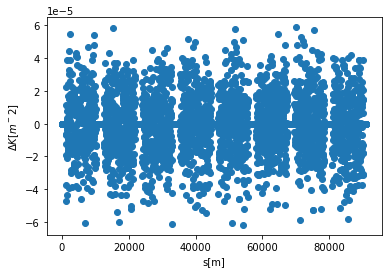

In [8]:
t0 = time.time()
gradErr = 1.e-3

simulateRandomGradientErrors(ring, gradErr, used_quadrpoles_families_ind)

t1 = time.time()
print(f"Execution time simulte erros: {t1-t0} sec")

#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twiss.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

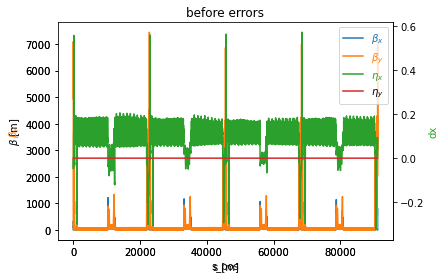

getOptics: 1.3264660835266113 sec


In [9]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss_err, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [10]:
#Measured orm

Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

0.0
0.0
7942.858383757861
52066.15128955


iteration0:
Execution time define matrices function: 75.61903548240662 sec
Execution time get inverse: 0.17652010917663574 sec
Execution time set correction: 0.010970830917358398 sec
beta beating with errors


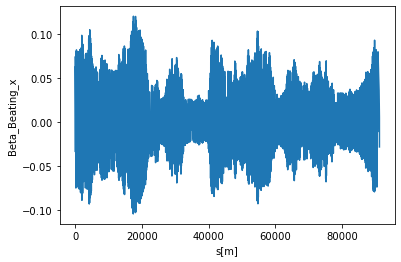

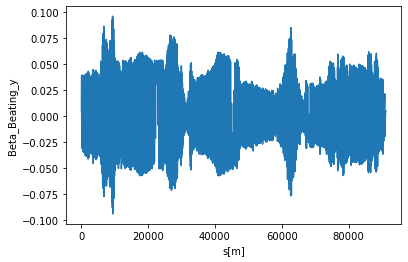

RMS beta beat, x:4.100463035673664%   y: 3.407440402854772%
STD beta beat, x:4.096851421091653%   y: 3.40527955077578%
beta beating after corrections


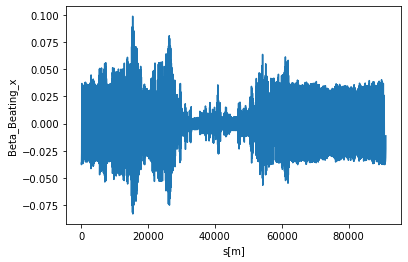

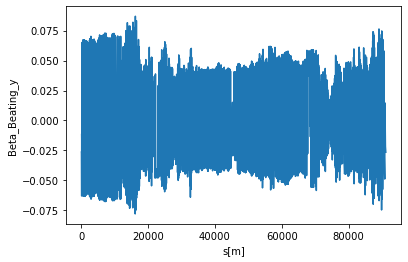

RMS beta beat, x:2.710850003175189%   y: 3.8634586255868206%
STD beta beat, x:2.7106820723720784%   y: 3.8621074475181127%
betax_correction reduction 33.88917350086966
betax_correction reduction -13.383013899523943
iteration1:
Execution time define matrices function: 73.71343803405762 sec
Execution time get inverse: 0.1672370433807373 sec
Execution time set correction: 0.010969400405883789 sec
beta beating with errors


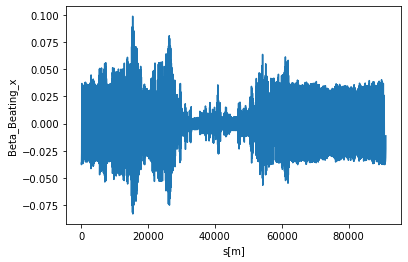

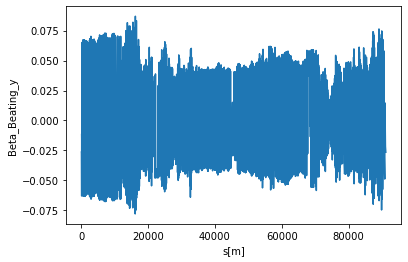

RMS beta beat, x:2.710850003175189%   y: 3.8634586255868206%
STD beta beat, x:2.7106820723720784%   y: 3.8621074475181127%
beta beating after corrections


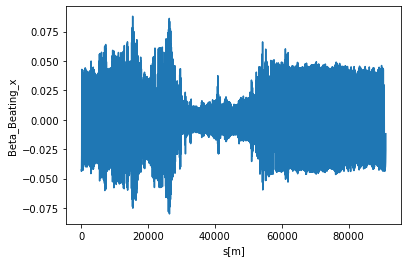

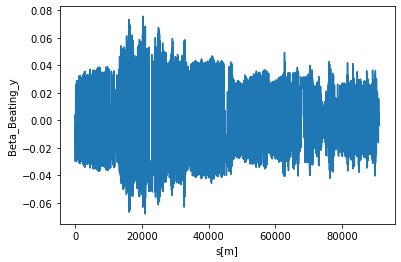

RMS beta beat, x:3.1367477534710897%   y: 2.7571504730821412%
STD beta beat, x:3.1365332538760886%   y: 2.7571383450083378%
betax_correction reduction -15.710856365975644
betax_correction reduction 28.635175362765597
iteration2:
Execution time define matrices function: 73.4527804851532 sec
Execution time get inverse: 0.20537424087524414 sec
Execution time set correction: 0.01070713996887207 sec
beta beating with errors


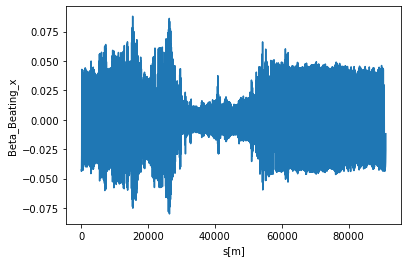

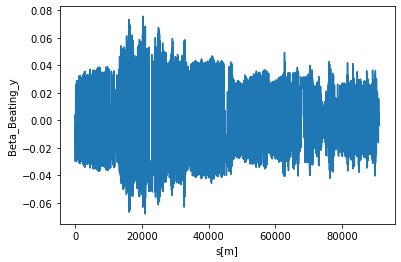

RMS beta beat, x:3.1367477534710897%   y: 2.7571504730821412%
STD beta beat, x:3.1365332538760886%   y: 2.7571383450083378%
beta beating after corrections


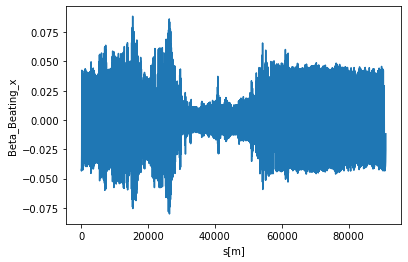

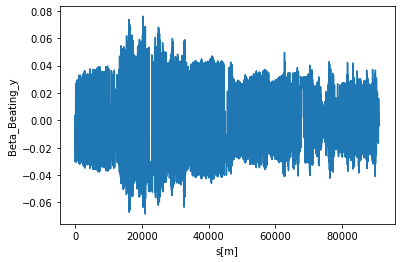

RMS beta beat, x:3.1216801492279225%   y: 2.7792991963174276%
STD beta beat, x:3.1214667770399944%   y: 2.7792837608653596%
betax_correction reduction 0.48035753676697324
betax_correction reduction -0.8033193491440827
iteration3:
Execution time define matrices function: 74.22571659088135 sec
Execution time get inverse: 0.19148802757263184 sec
Execution time set correction: 0.013961076736450195 sec
beta beating with errors


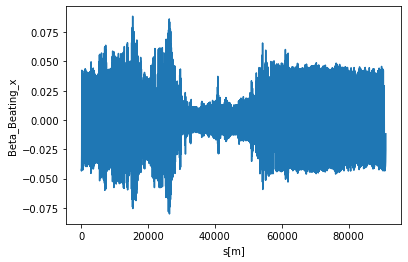

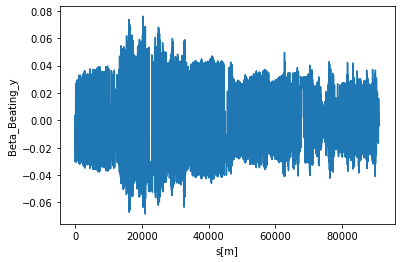

RMS beta beat, x:3.1216801492279225%   y: 2.7792991963174276%
STD beta beat, x:3.1214667770399944%   y: 2.7792837608653596%
beta beating after corrections


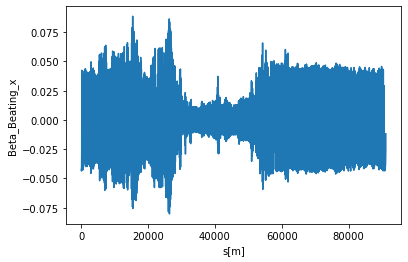

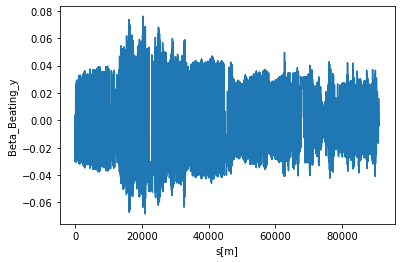

RMS beta beat, x:3.1224001710675555%   y: 2.7790256382658507%
STD beta beat, x:3.12218668347512%   y: 2.779010310350375%
betax_correction reduction -0.02306520223769315
betax_correction reduction 0.00984269890551559
iteration4:
Execution time define matrices function: 74.42815160751343 sec
Execution time get inverse: 0.19024085998535156 sec
Execution time set correction: 0.01196908950805664 sec
beta beating with errors


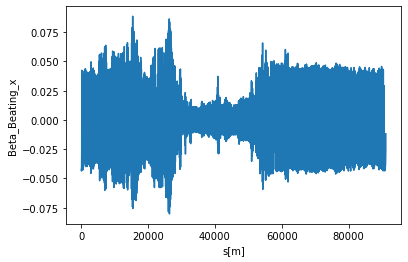

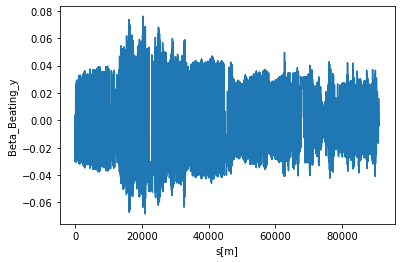

RMS beta beat, x:3.1224001710675555%   y: 2.7790256382658507%
STD beta beat, x:3.12218668347512%   y: 2.779010310350375%
beta beating after corrections


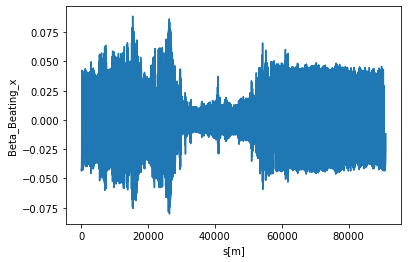

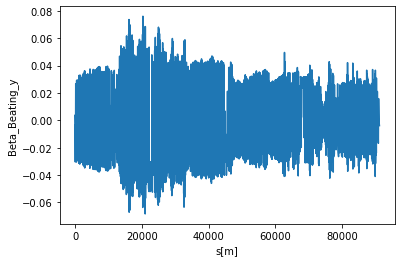

RMS beta beat, x:3.1224065417910487%   y: 2.7790319972995827%
STD beta beat, x:3.122193052667982%   y: 2.7790166659682014%
betax_correction reduction -0.00020403289597847873
betax_correction reduction -0.00022882242050048518


In [11]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)

    Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

    t0 = time.time()
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    t1 = time.time()
    print(f"Execution time define matrices function: {t1-t0} sec")
    Nk = len(dCx)
    cut = 406
    t0 = time.time()
    r= getInverse(A, B,Nk, cut)
    t1 = time.time()
    print(f"Execution time get inverse: {t1-t0} sec")
    #print("r................", r)
    t0 = time.time()
    setCorrection(ring, r , used_quadrpoles_families_ind)
    t1 = time.time()
    print(f"Execution time set correction: {t1-t0} sec")
    twiss_corr = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corr)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    #Cxx2, Cxy2= ORM_x(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)
    #Cyy2, Cyx2= ORM_y(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)

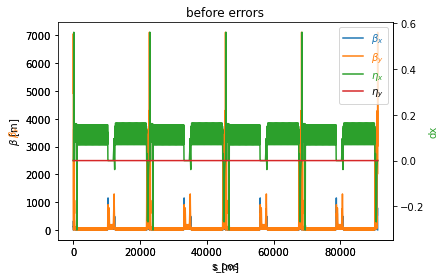

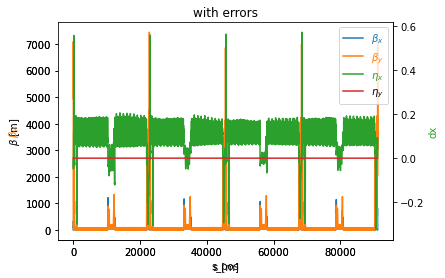

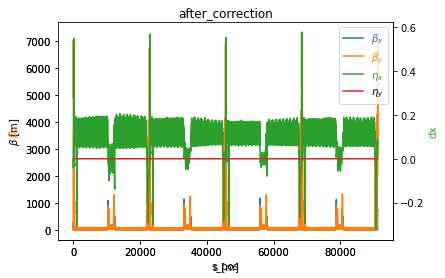

In [12]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corr, 'after_correction')

In [13]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 20052.93996810913 sec
